# IMPORT NECESSARY LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('avocado.csv')# LOADING OUR DATASET

In [19]:
data.head()# CHECKING FIRST 5 ROWS

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [20]:
data.shape # checking the shape of our dataset

(18249, 14)

In [21]:
data = data.drop('Unnamed: 0', axis = 1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [23]:
data.isnull().sum()# No null values in our dataset

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [24]:
data.dtypes # checking the data type of our dataset

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# EXPLORATORY DATA ANALYSIS

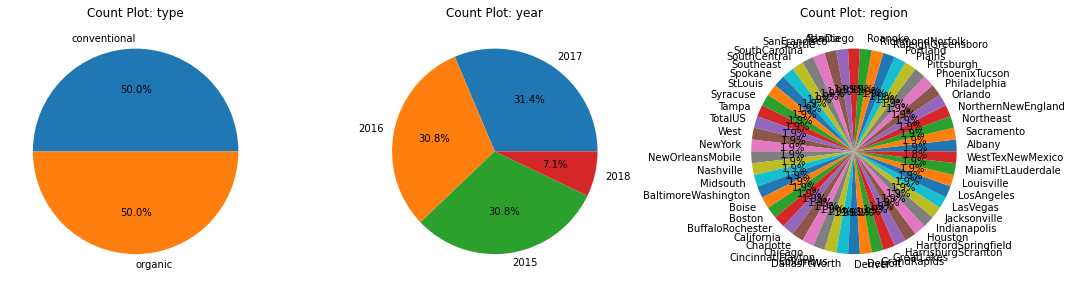

In [25]:
categorical_columns = ['type', 'year', 'region']
plt.figure(figsize=(15, 5))

# Create pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    category_counts = data[column].value_counts()

    # Create the pie chart
    plt.subplot(1, len(categorical_columns), i + 1)
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Count Plot: {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the pie charts
plt.show()


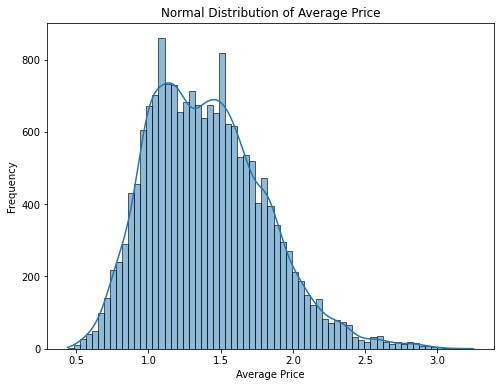

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data['AveragePrice'], kde=True)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Average Price')
plt.show()

In [ ]:
#Average Price distribution shows that for most cases price of avocado is between 1.1 to 1.4.

In [27]:
data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [29]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


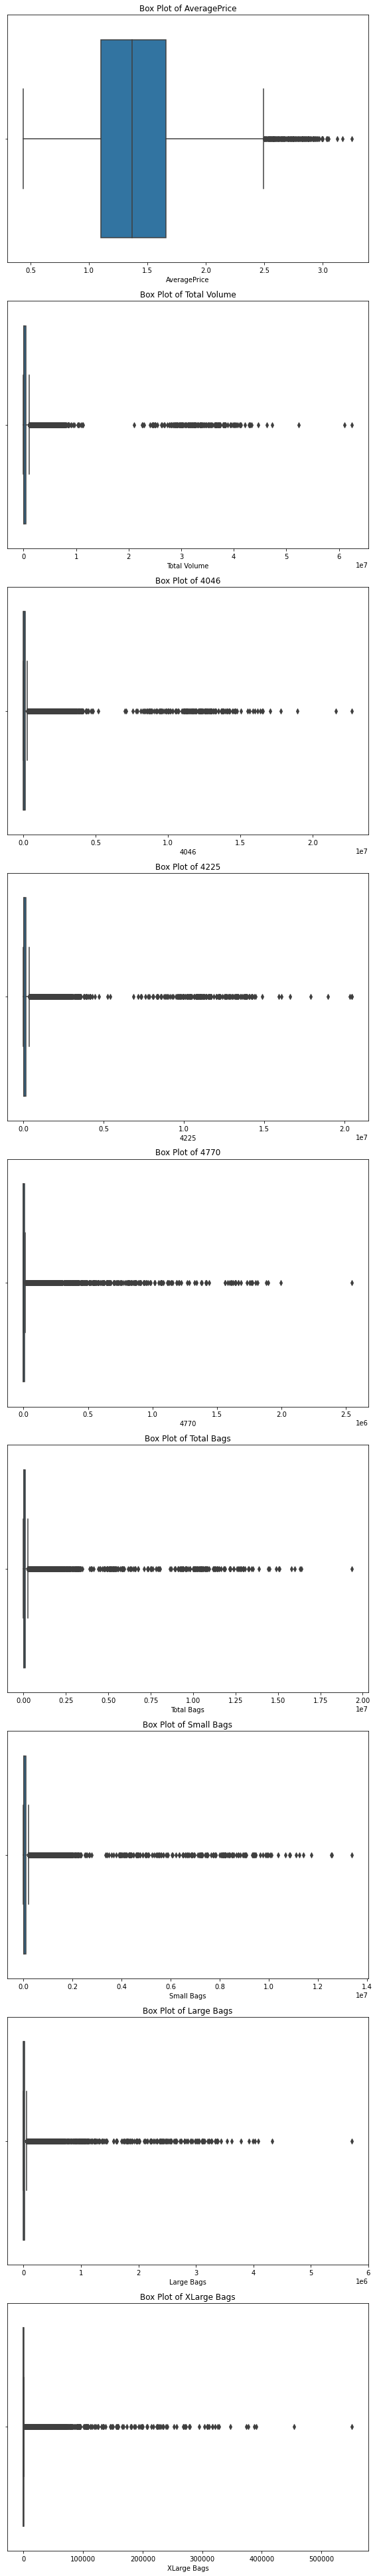

In [30]:
# Select the numerical features
numerical_features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(8, 6 * len(numerical_features)))

# Iterate over each feature and create a box plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()


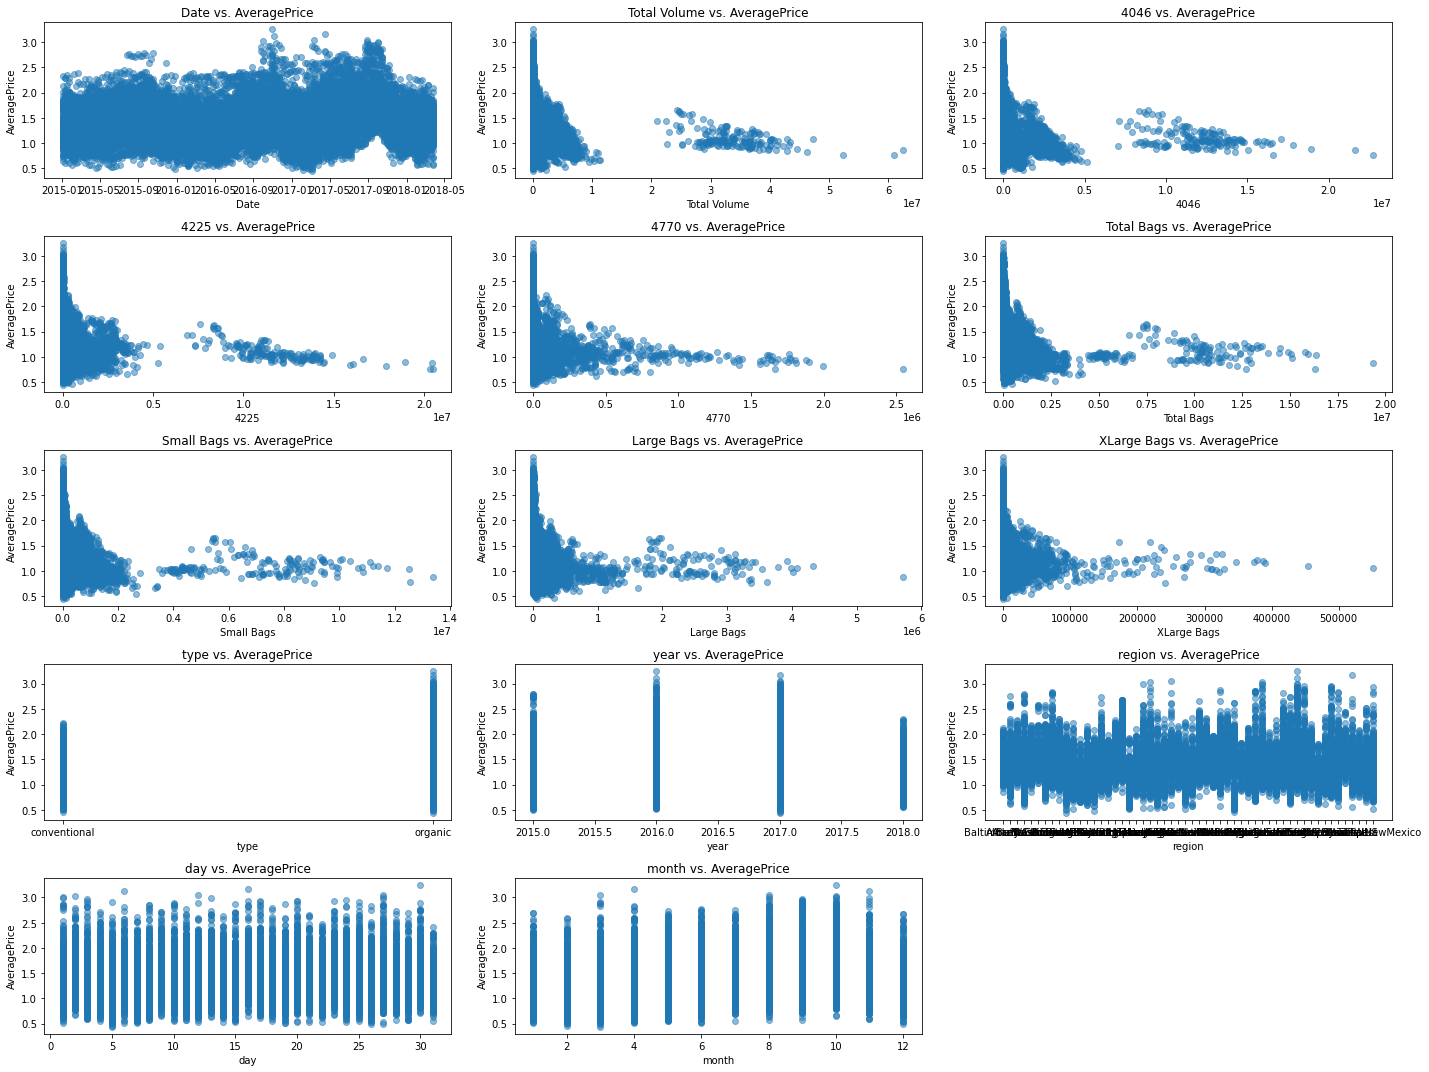

In [32]:
target_variable = 'AveragePrice'

# Get the list of features (excluding the target variable)
features = data.drop(target_variable, axis=1).columns

# Set the figure size for the subplots
plt.figure(figsize=(20, 15))

# Create scatter plots between each feature and the target variable
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    plt.scatter(data[feature], data[target_variable], alpha=0.5)
    plt.title(f'{feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the scatter plots
plt.show()


In [ ]:
# from the above scatter plot we conclude that organic ones are having high average price
#in 2016 and 2017 the average prices are high 

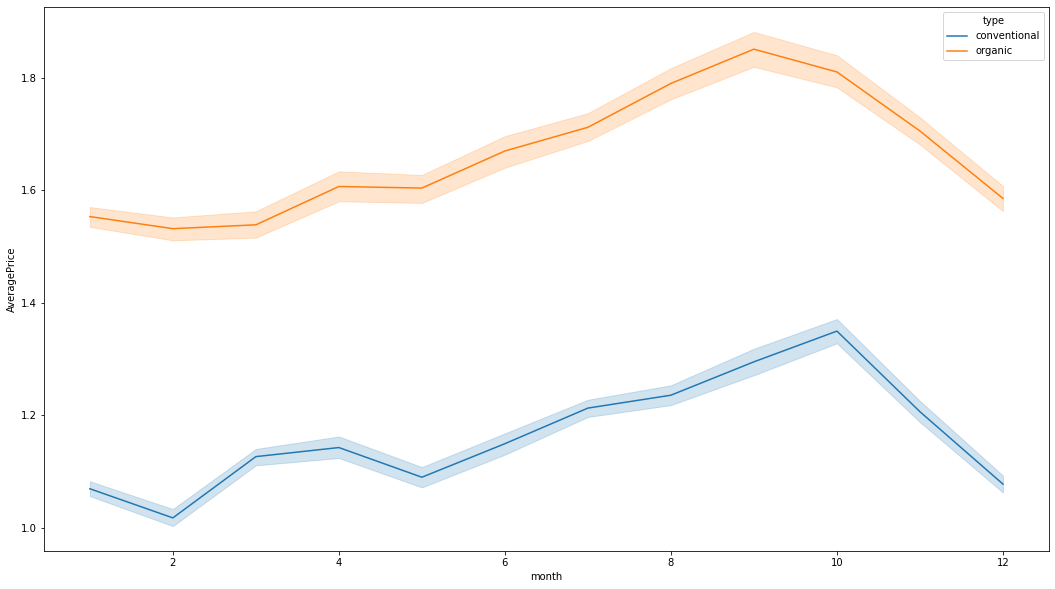

In [126]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=data)
plt.show()

In [ ]:
#it shows that the average price of organic ones are high
# both the organic and conventinal are hihg in demand from august to october

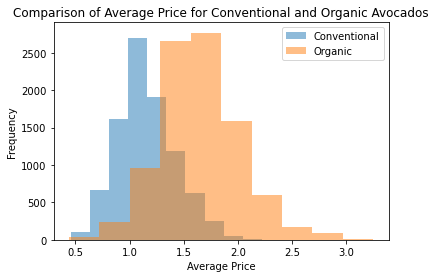

In [127]:
# Filter the data for conventional and organic avocados
conventional = data[data['type'] == 'conventional']
organic = data[data['type'] == 'organic']

# Plot the average price for conventional and organic avocados
plt.figure()
plt.hist(conventional['AveragePrice'], alpha=0.5, label='Conventional')
plt.hist(organic['AveragePrice'], alpha=0.5, label='Organic')
plt.title('Comparison of Average Price for Conventional and Organic Avocados')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

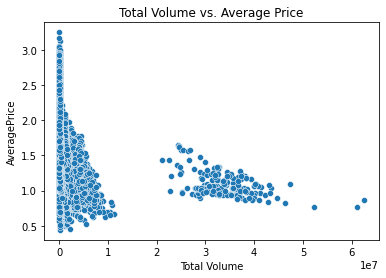

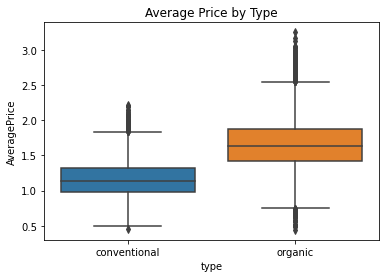

In [128]:
sns.scatterplot(x='Total Volume', y='AveragePrice', data=data)
plt.title('Total Volume vs. Average Price')
plt.show()

# Boxplot of average price by type
sns.boxplot(x='type', y='AveragePrice', data=data)
plt.title('Average Price by Type')
plt.show()



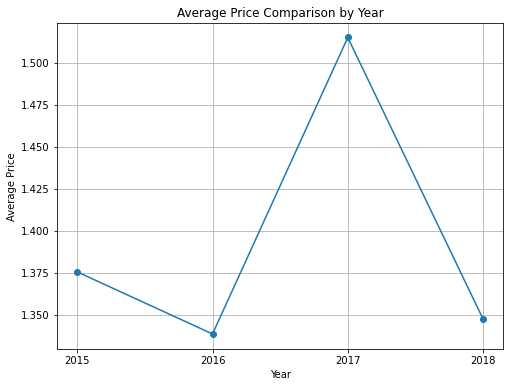

In [129]:
# Calculate the average price by year
price_by_year = data.groupby('year')['AveragePrice'].mean()

# Plot the price by year
plt.figure(figsize=(8, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o')
plt.title('Average Price Comparison by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(price_by_year.index)
plt.grid(True)
plt.show()


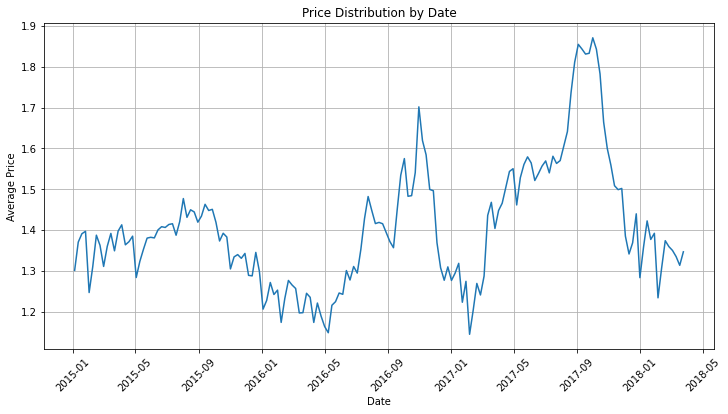

In [130]:
#Price distribution over the date column

price_by_date = data.groupby('Date')['AveragePrice'].mean()


plt.figure(figsize=(12, 6))
plt.plot(price_by_date.index, price_by_date.values)
plt.title('Price Distribution by Date')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

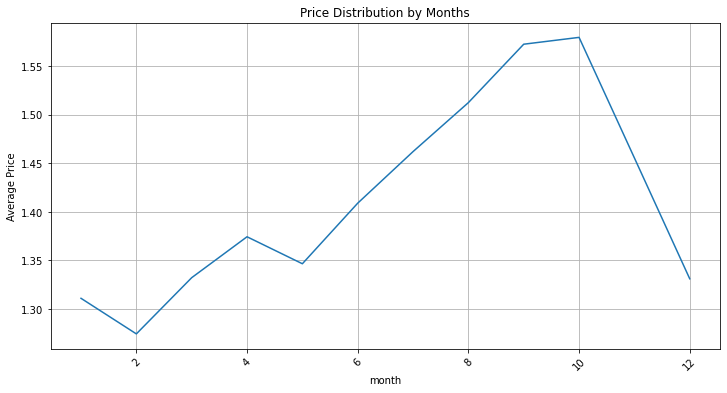

In [56]:
#Price distribution over the month column

price_by_month = data.groupby('month')['AveragePrice'].mean()


plt.figure(figsize=(12, 6))
plt.plot(price_by_month.index, price_by_month.values)
plt.title('Price Distribution by Months')
plt.xlabel('month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# high sale in month of august to october and in year 2017

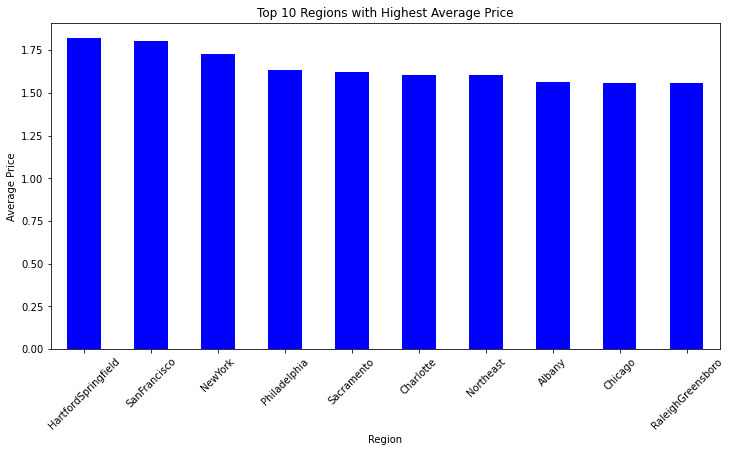

In [131]:
average_price_by_region = data.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

# Select the top 10 regions with the highest average price
top_10_regions = average_price_by_region.head(10)

# Plot the average price by region for the top 10 regions
plt.figure(figsize=(12, 6))
top_10_regions.plot(kind='bar', color='blue')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Top 10 Regions with Highest Average Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Looks like these region are where price is very high
HartfordSpringfield
SanFrancisco
NewYork
Philadelphia
Sacramento

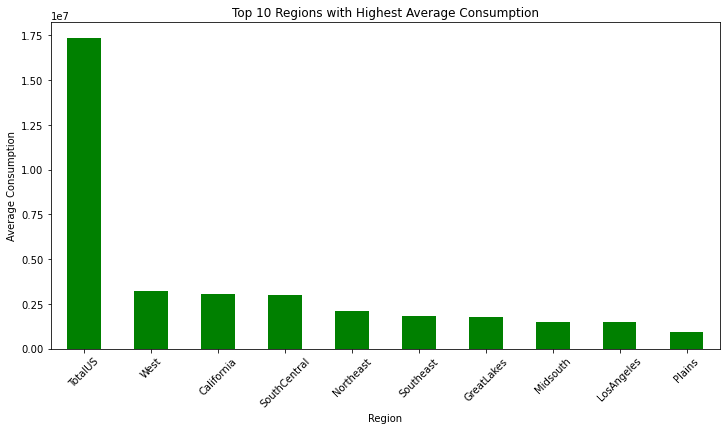

In [132]:
# Calculate the average consumption by region
average_consumption_by_region = data.groupby('region')['Total Volume'].mean().sort_values(ascending=False)

# Select the top 10 regions with the highest average consumption
top_10_regions = average_consumption_by_region.head(10)

# Plot the average consumption by region for the top 10 regions
plt.figure(figsize=(12, 6))
top_10_regions.plot(kind='bar', color='green')
plt.xlabel('Region')
plt.ylabel('Average Consumption')
plt.title('Top 10 Regions with Highest Average Consumption')
plt.xticks(rotation=45)
plt.show()


In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


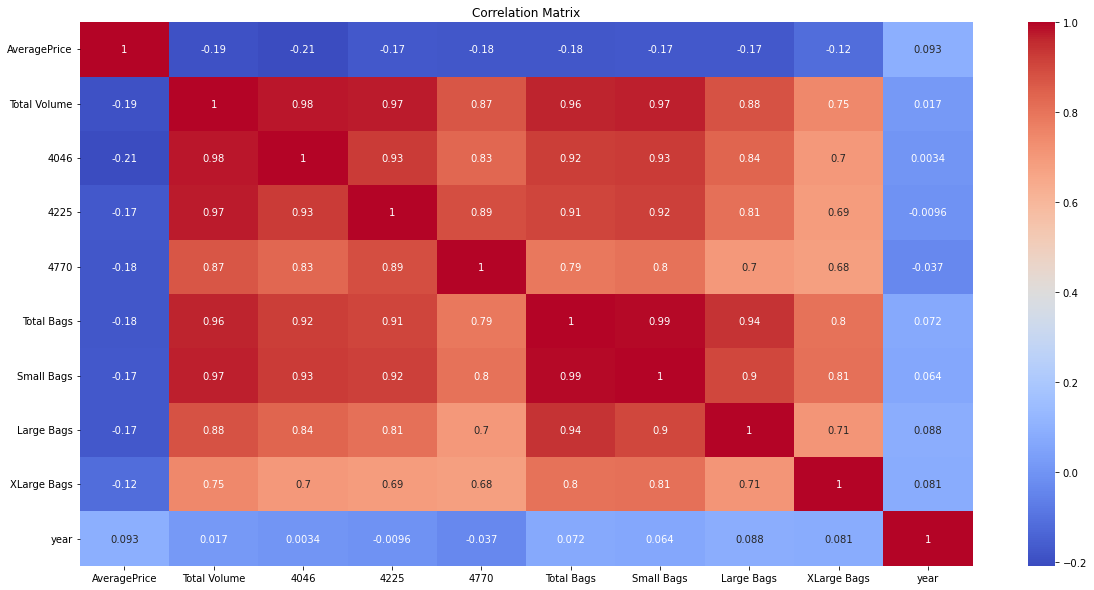

In [29]:
# Correlation matrix
plt.figure(figsize = (20, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


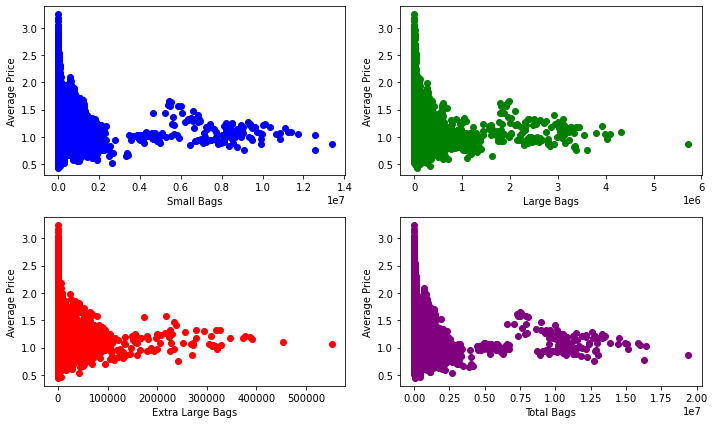

In [33]:

# Select the columns of interest
columns_of_interest = ['Small Bags', 'Large Bags', 'XLarge Bags', 'Total Bags', 'AveragePrice']

# Create scatter plots
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(data['Small Bags'], data['AveragePrice'], c='blue')
plt.xlabel('Small Bags')
plt.ylabel('Average Price')

plt.subplot(2, 2, 2)
plt.scatter(data['Large Bags'], data['AveragePrice'], c='green')
plt.xlabel('Large Bags')
plt.ylabel('Average Price')

plt.subplot(2, 2, 3)
plt.scatter(data['XLarge Bags'], data['AveragePrice'], c='red')
plt.xlabel('Extra Large Bags')
plt.ylabel('Average Price')

plt.subplot(2, 2, 4)
plt.scatter(data['Total Bags'], data['AveragePrice'], c='purple')
plt.xlabel('Total Bags')
plt.ylabel('Average Price')

plt.tight_layout()

# Display the scatter plots
plt.show()


In [24]:
columns_of_interest = ['Small Bags', 'Large Bags', 'XLarge Bags', 'Total Bags']

# Create a subset of the dataframe with the selected columns
subset_data = data[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Print the correlation matrix
print(corr_matrix)


             Small Bags  Large Bags  XLarge Bags  Total Bags
Small Bags     1.000000    0.902589     0.806845    0.994335
Large Bags     0.902589    1.000000     0.710858    0.943009
XLarge Bags    0.806845    0.710858     1.000000    0.804233
Total Bags     0.994335    0.943009     0.804233    1.000000


In [ ]:
#As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

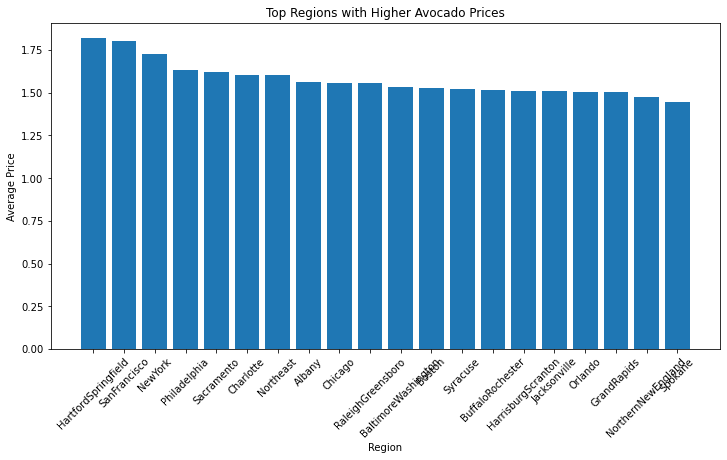

In [14]:
# Group the data by region and calculate the mean price
price_by_region = data.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

# Select the top regions with higher prices
top_regions = price_by_region.head(20)

# Plot the average price by region
plt.figure(figsize=(12, 6))
plt.bar(top_regions.index, top_regions.values)
plt.title('Top Regions with Higher Avocado Prices')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


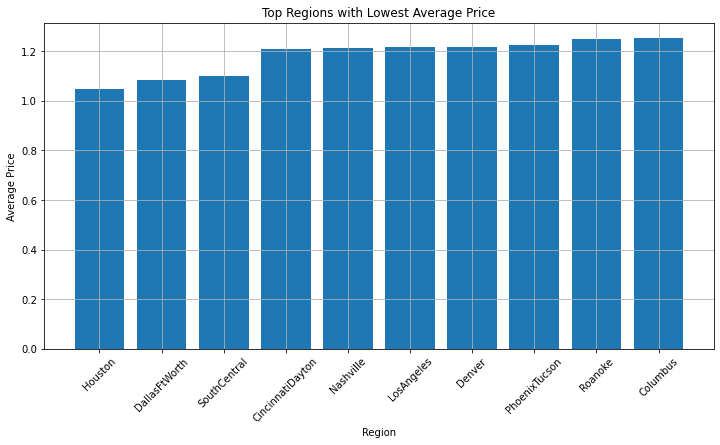

In [15]:

# Calculate the average price by region
avg_price_by_region = data.groupby('region')['AveragePrice'].mean()

# Sort the regions by average price in ascending order
sorted_regions = avg_price_by_region.sort_values(ascending=True)

# Select the top 10 regions with the lowest average price
top_low_price_regions = sorted_regions.head(10)

# Plot the average price for the top low price regions
plt.figure(figsize=(12, 6))
plt.bar(top_low_price_regions.index, top_low_price_regions.values)
plt.title('Top Regions with Lowest Average Price')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [39]:
# Find the row with the highest average price
highest_price_row = data[data['AveragePrice'] == data['AveragePrice'].max()]

# Get the year and region with the highest average price
highest_price_year = highest_price_row['year'].values[0]
highest_price_region = highest_price_row['region'].values[0]

# Print the results
print(f"The highest average price of avocados is in the year {highest_price_year} and in the region {highest_price_region}.")


The highest average price of avocados is in the year 2016 and in the region SanFrancisco.


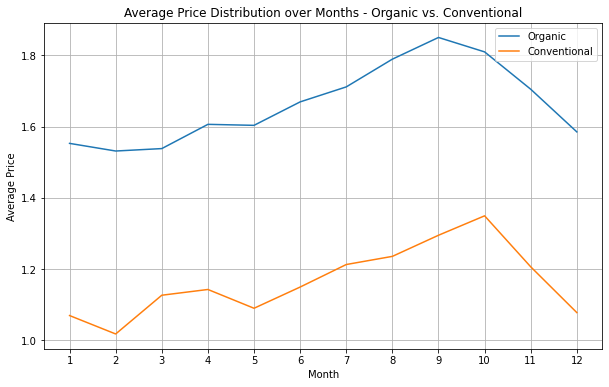

In [42]:

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month and year from the 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
organic_df = data[data['type'] == 'organic']
conventional_df = data[data['type'] == 'conventional']

# Calculate the average price per month for organic type
organic_avg_price = organic_df.groupby('Month')['AveragePrice'].mean()

# Calculate the average price per month for conventional type
conventional_avg_price = conventional_df.groupby('Month')['AveragePrice'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(organic_avg_price.index, organic_avg_price.values, label='Organic')
plt.plot(conventional_avg_price.index, conventional_avg_price.values, label='Conventional')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Distribution over Months - Organic vs. Conventional')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)

# Display the graph
plt.show()


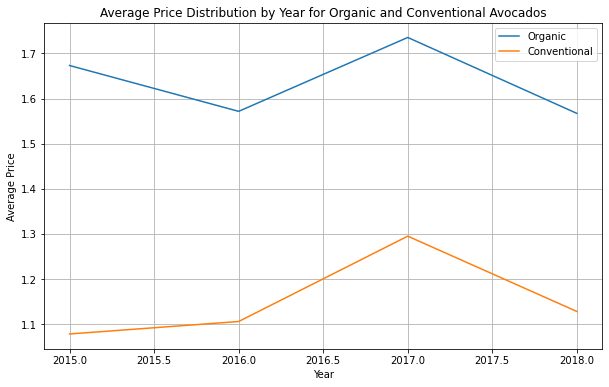

In [8]:
organic_data = data[data['type'] == 'organic']
conventional_data = data[data['type'] == 'conventional']

# Group the data by year and calculate the average price
organic_avg_price = organic_data.groupby('year')['AveragePrice'].mean()
conventional_avg_price = conventional_data.groupby('year')['AveragePrice'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(organic_avg_price.index, organic_avg_price.values, label='Organic')
plt.plot(conventional_avg_price.index, conventional_avg_price.values, label='Conventional')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Year for Organic and Conventional Avocados')
plt.legend()
plt.grid(True)

# Display the graph
plt.show()


In [ ]:
# conclusion
#Every year price of the avocado are higher in second half of year perticulary in september and october month
#prices are increasing year by year prices of avocados are higher in autumn season


In [34]:
data['region'].nunique()# its better to drop the region column as its more in number which can create disturbance to our datset

54

In [35]:
data = data.drop(columns = ['region', 'Date'], axis = 1)

In [36]:
# Define the mapping dictionary
mapping = {'conventional': 0, 'organic': 1}

# Map the 'type' column to 0 and 1
data['type'] = data['type'].map(mapping)

In [37]:
data.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,27,12


# MODEL TRAINING AND TESTING

In [38]:
data.shape

(18249, 13)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Instantiate Linear Regression model
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svr_reg = SVR()


In [41]:
X = data.drop('AveragePrice', axis=1)  # Replace 'target_variable_column' with the name of the column you want to predict
y = data['AveragePrice']


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
# Define a dictionary to store the model names and their corresponding accuracy scores
accuracy_scores = {}

# Instantiate Linear Regression model and calculate accuracy score
linear_reg.fit(X_train, y_train)
linear_reg_score = linear_reg.score(X_test, y_test)
accuracy_scores['Linear Regression'] = linear_reg_score

# Instantiate Decision Tree Regression model and calculate accuracy score
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg_score = decision_tree_reg.score(X_test, y_test)
accuracy_scores['Decision Tree Regression'] = decision_tree_reg_score

# Instantiate Random Forest Regression model and calculate accuracy score
random_forest_reg.fit(X_train, y_train)
random_forest_reg_score = random_forest_reg.score(X_test, y_test)
accuracy_scores['Random Forest Regression'] = random_forest_reg_score

# Instantiate Support Vector Regression model and calculate accuracy score
svr_reg.fit(X_train, y_train)
svr_reg_score = svr_reg.score(X_test, y_test)
accuracy_scores['Support Vector Regression'] = svr_reg_score

# Print the accuracy scores
for model, score in accuracy_scores.items():
    print(f'{model}: Accuracy Score = {score}')



Linear Regression: Accuracy Score = 0.43307059346734145
Decision Tree Regression: Accuracy Score = 0.7126969832927208
Random Forest Regression: Accuracy Score = 0.8666990386311969
Support Vector Regression: Accuracy Score = 0.5710569799107257


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

# Instantiate Random Forest Regression model
random_forest_reg = RandomForestRegressor()

# Fit the model to the training data
random_forest_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print the scores
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Squared Error (MSE): 0.021429169375342456
Root Mean Squared Error (RMSE): 0.1463870533050736


In [ ]:
#With the help of notebook I learnt how EDA can be carried out using Pandas and other plotting libraries.
#Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
#I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
#I also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
#I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
#The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
#I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
#This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Instantiate Random Forest Regression model
random_forest_reg = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)
print("Best Model MSE:", mse)
print("Best Model RMSE:", rmse)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model MSE: 0.021107247182344
Best Model RMSE: 0.14528333415207678


In [ ]:
random_forest_reg.fit(X_train, y_train)
random_forest_reg_score = random_forest_reg.score(X_test, y_test)
accuracy_scores['Random Forest Regression'] = random_forest_reg_score


In [46]:
from sklearn.metrics import r2_score

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy score (R-squared score)
accuracy = r2_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8686290682283409


In [54]:
random_forest_reg = RandomForestRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
random_forest_reg.fit(X_train, y_train)
random_forest_reg_score = random_forest_reg.score(X_test, y_test)

In [53]:
rg.fit(X_train, y_train)
rg_score = rg.score(X_test, y_test)
accuracy_scores['Random Forest Regression'] = rg

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate Random Forest Regression model
random_forest_reg = RandomForestRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)

# Fit the model to the training data
random_forest_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_reg.predict(X_test)

# Calculate the accuracy score (R-squared score)
accuracy = r2_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8686157733999881


In [ ]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions on new data
new_data = [[...]]  # Replace with your new data
predictions = loaded_model.predict(new_data)

# Print the predictions
print("Predictions:", predictions)


In [58]:
import joblib

In [59]:
joblib.dump(random_forest_reg, "model_name")

['model_name']

In [60]:
model = joblib.load('model_name')

In [62]:
import pandas as pd

# Create a sample of new data
new_data = pd.DataFrame({
    'Total Volume': [64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 87123.97, 122743.06, 
                     78994.15, 59993.00, 68133.08, 41567.62, 59662.32, 81936.85, 64521.36, 
                     75863.03, 60307.79, 74109.17, 69759.01, 74941.24, 67442.87],
    '4046': [1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 1368.92, 704.99, 1022.15, 
             845.42, 1136.84, 1184.27, 1349.85, 1061.02, 1405.21, 1022.15, 1200.88, 
             1080.36, 1036.74, 1092.05],
    '4225': [54454.85, 44638.81, 109149.67, 71976.41, 43919.39, 73656.10, 112260.07, 
             71976.41, 48639.00, 55693.76, 31969.51, 48741.04, 60735.98, 52559.83, 
             70011.29, 52560.58, 65552.62, 53102.45, 66677.06, 58514.91],
    '4770': [48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.25, 47.41, 63.27, 55.45, 
             41.38, 42.96, 80.00, 53.38, 75.85, 50.00, 65.67, 57.41, 50.00, 42.96],
    'Total Bags': [8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91, 8715.16, 5556.98, 
                   7628.80, 9394.11, 6018.87, 6463.50, 9055.32, 6329.39, 8006.22, 6351.35, 
                   6905.09, 6657.19, 6956.82, 7204.60],
    'Small Bags': [8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47, 8196.81, 5267.87, 
                   7388.41, 9090.48, 5883.16, 6301.30, 8835.03, 6125.90, 7762.87, 6095.90, 
                   6633.61, 6451.90, 6847.08, 7137.17],
    'Large Bags': [93.25, 97.49, 103.14, 133.76, 140.69, 119.44, 140.35, 102.11, 210.39, 
                   151.63, 135.71, 119.44, 134.29, 170.49, 200.35, 165.45, 147.48, 
                   142.29, 109.74, 67.73],
    'XLarge Bags': [0.0, 0.0, 0.0, 0.0, 0.0, 7.84, 0.0, 187.00, 29.00, 152.00, 
                    0.0, 43.76, 86.00, 33.00, 43.00, 90.00, 123.00, 63.00, 10.00, 0.0],
    'type': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'year': [2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 
             2018, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018],
    'day': [27, 12, 18, 2, 29, 14, 20, 4, 31, 16, 22, 6, 25, 10, 16, 1, 28, 13, 19, 3],
    'month': [12, 6, 9, 1, 11, 5, 8, 2, 10, 4, 7, 3, 12, 6, 9, 1, 11, 5, 8, 2]
})

# Print the new data
print("New Data:")
print(new_data)


New Data:
    Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0       64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1       54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2      118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3       78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4       51039.60   941.48   43919.39   75.78     6183.95     5986.26   
5       87123.97  1184.27   73656.10   43.61     6683.91     6556.47   
6      122743.06  1368.92  112260.07   93.25     8715.16     8196.81   
7       78994.15   704.99   71976.41   47.41     5556.98     5267.87   
8       59993.00  1022.15   48639.00   63.27     7628.80     7388.41   
9       68133.08   845.42   55693.76   55.45     9394.11     9090.48   
10      41567.62  1136.84   31969.51   41.38     6018.87     5883.16   
11      59662.32  1184.27   48741.04   42.96     6463.50     6301.30   
12      81936.85  1349.85   60735.98   80.00     9055.

In [64]:
model.predict(new_data)


array([0.94873333, 1.5465    , 0.94873333, 1.88916667, 0.94873333,
       1.5465    , 0.94873333, 1.5465    , 1.00233333, 1.5465    ,
       0.94873333, 1.5465    , 1.00233333, 1.5465    , 1.00233333,
       1.8874    , 1.00233333, 1.5465    , 0.99153333, 1.5465    ])

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features and target variable
X = data.drop("type", axis=1)
y = data["type"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9961643835616438


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features and target variable
X = data.drop("type", axis=1)
y = data["type"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the classifiers
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Fit and predict using each model
models = {"Logistic Regression": logreg, "Decision Tree": dt, "Random Forest": rf}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9295890410958904
Decision Tree Accuracy: 0.986027397260274
Random Forest Accuracy: 0.9967123287671232


In [69]:
import joblib
joblib.dump(rf, "model_name")
model = joblib.load('model_name')

In [71]:
# Create a sample of new data
new_data = pd.DataFrame({
    'AveragePrice': [1.33, 1.29, 1.35, 0.93, 1.02, 1.28, 1.35, 1.08, 1.03, 1.12,
                     1.05, 1.02, 1.07, 1.10, 1.05, 1.03, 1.09, 1.07, 1.05, 1.12],
    'Total Volume': [64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 87123.97, 122743.06, 
                     78994.15, 59993.00, 68133.08, 41567.62, 59662.32, 81936.85, 64521.36, 
                     75863.03, 60307.79, 74109.17, 69759.01, 74941.24, 67442.87],
    '4046': [1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 1368.92, 704.99, 1022.15, 
             845.42, 1136.84, 1184.27, 1349.85, 1061.02, 1405.21, 1022.15, 1200.88, 
             1080.36, 1036.74, 1092.05],
    '4225': [54454.85, 44638.81, 109149.67, 71976.41, 43919.39, 73656.10, 112260.07, 
             71976.41, 48639.00, 55693.76, 31969.51, 48741.04, 60735.98, 52559.83, 
             70011.29, 52560.58, 65552.62, 53102.45, 66677.06, 58514.91],
    '4770': [48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.25, 47.41, 63.27, 55.45, 
             41.38, 42.96, 80.00, 53.38, 75.85, 50.00, 65.67, 57.41, 50.00, 42.96],
    'Total Bags': [8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91, 8715.16, 5556.98, 
                   7628.80, 9394.11, 6018.87, 6463.50, 9055.32, 6329.39, 8006.22, 6351.35, 
                   6905.09, 6657.19, 6956.71, 7204.12],
    'Small Bags': [8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47, 8196.81, 5267.87, 
                   7388.41, 9090.48, 5883.16, 6301.30, 8835.03, 6125.90, 7762.87, 6095.90, 
                   6633.61, 6451.90, 6847.08, 7137.17],
    'Large Bags': [93.25, 97.49, 103.14, 133.76, 140.69, 119.44, 140.35, 102.11, 210.39, 
                   151.63, 135.71, 119.44, 134.29, 170.49, 200.35, 165.45, 147.48, 
                   142.29, 109.74, 67.73],
    'XLarge Bags': [0.0, 0.0, 0.0, 0.0, 0.0, 7.84, 0.0, 187.00, 29.00, 152.00, 
                    0.0, 43.76, 86.00, 33.00, 43.00, 90.00, 123.00, 63.00, 10.00, 0.0],
    'year': [2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018, 
             2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018],
    'day': [27, 12, 18, 2, 29, 14, 20, 4, 31, 16, 22, 6, 25, 10, 16, 1, 28, 13, 19, 3],
    'month': [12, 6, 9, 1, 11, 5, 8, 2, 10, 4, 7, 3, 12, 6, 9, 1, 11, 5, 8, 2]
})

# Print the new data
print("New Data:")
print(new_data)


New Data:
    AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0           1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1           1.29      54876.98   674.28   44638.81   58.33     9505.56   
2           1.35     118220.22   794.70  109149.67  130.50     8145.35   
3           0.93      78992.15  1132.00   71976.41   72.58     5811.16   
4           1.02      51039.60   941.48   43919.39   75.78     6183.95   
5           1.28      87123.97  1184.27   73656.10   43.61     6683.91   
6           1.35     122743.06  1368.92  112260.07   93.25     8715.16   
7           1.08      78994.15   704.99   71976.41   47.41     5556.98   
8           1.03      59993.00  1022.15   48639.00   63.27     7628.80   
9           1.12      68133.08   845.42   55693.76   55.45     9394.11   
10          1.05      41567.62  1136.84   31969.51   41.38     6018.87   
11          1.02      59662.32  1184.27   48741.04   42.96     6463.50   
12          1.07      81936.

In [72]:
model.predict(new_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)